# Customer's digital interaction on ADP website

#### ADP’s Digital team tracks behavior of web visitors on ADP.com website. The attached data gives information about web activity of our online visitors sourced from Paid Search over a month. This is a free form analysis and either R or Python can be used to run the analysis. Here are some general expectations:

- Analyze the data to identify patterns 
- Identify anomalies/outlier in the data
- Try to predict which visitors are more likely to submit a lead form


In [56]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
plt.style.use('ggplot')
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import linear_model

from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB,label_binarize,LabelBinarizer
from sklearn.svm import LinearSVC, SVC,libsvm_sparse
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_excel('CaseSTudy_2_data.xlsx')

In [5]:
df.shape

(49420, 18)

In [6]:
# check null values 
df.isnull().sum()

Visitor_Identifier       0
Avg_Session_Duration     0
avg_time_on_page         0
Channel_Grouping         0
device_category          0
non_shopper              0
Pages_Session            0
pageviews                0
Session_1plus_minute     0
Session_3plus_minutes    0
Session_3plus_pages      0
Session_5plus_minutes    0
Session_5plus_pages      0
session_duration         0
sessions                 0
Unique_Views2_BU         0
user_type                0
Lead_Form_submission     0
dtype: int64

In [7]:
df.head()

,Visitor_Identifier,Avg_Session_Duration,avg_time_on_page,Channel_Grouping,device_category,non_shopper,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions,Unique_Views2_BU,user_type,Lead_Form_submission
0,1.767882e+09,210.00,210.0,Paid Search,desktop,Yes,2.0,8,1,1,1,1,0,840,4,0,Returning Visitor,0
1,1.604589e+09,0.00,0.0,Paid Search,desktop,No,1.0,10,0,0,0,0,0,0,10,0,Returning Visitor,0
2,1.515450e+09,108.33,54.0,Paid Search,desktop,Yes,3.0,9,1,1,1,1,1,325,3,0,Returning Visitor,0
3,4.077739e+08,15.00,0.0,Paid Search,desktop,No,1.0,2,0,0,0,0,0,30,2,0,Returning Visitor,0
4,1.070705e+09,0.00,0.0,Paid Search,mobile,No,1.0,1,0,0,0,0,0,0,1,0,New Visitor,0


In [8]:
df.columns

Index(['Visitor_Identifier', 'Avg_Session_Duration', 'avg_time_on_page',
       'Channel_Grouping', 'device_category', 'non_shopper', 'Pages_Session',
       'pageviews', 'Session_1plus_minute', 'Session_3plus_minutes',
       'Session_3plus_pages', 'Session_5plus_minutes', 'Session_5plus_pages',
       'session_duration', 'sessions', 'Unique_Views2_BU', 'user_type',
       'Lead_Form_submission'],
      dtype='object')

#### EDA

- exploratory analysis to see how customers interact with ADP website
- we plot barchart to see number of customers visit from different channels.
- we plot the average time spend on page through different channel


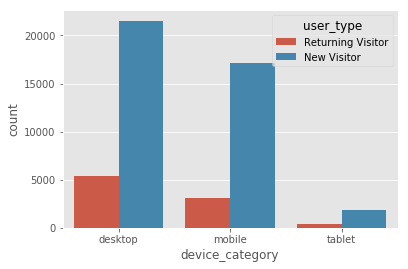

In [38]:
# bar plot for device category 
sns.countplot(df['device_category'],data=df,hue='user_type')
plt.savefig("/Users/akshay/Downloads/ADP_challange/ADP_datascientist_manager/device_category_counts.png")


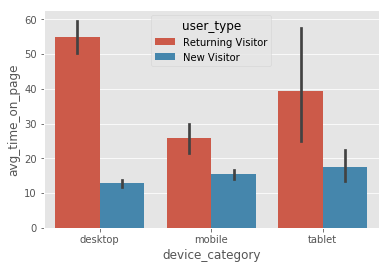

In [65]:
sns.barplot(x='device_category',y='avg_time_on_page',data=df,hue='user_type')
plt.savefig("/Users/akshay/Downloads/ADP_challange/ADP_datascientist_manager/avg_pagetime_devicecategory_usertype.png")


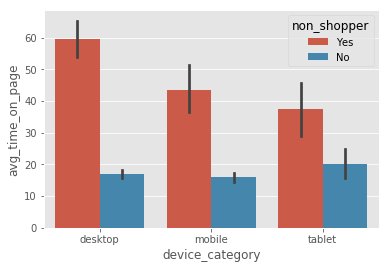

In [66]:
sns.barplot(x='device_category',y='avg_time_on_page',data=df,hue='non_shopper')
plt.savefig("/Users/akshay/Downloads/ADP_challange/ADP_datascientist_manager/avg_pagetime_devicecategory_nonshopper.png")


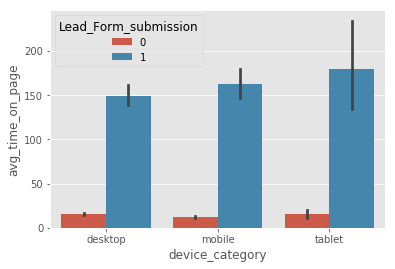

In [67]:
sns.barplot(x='device_category',y='avg_time_on_page',data=df,hue='Lead_Form_submission')
plt.savefig("/Users/akshay/Downloads/ADP_challange/ADP_datascientist_manager/avg_pagetime_devicecategory_leadform.png")


# Anomaly detection using PyOD Library 

## Anomaly or Outlier detection

- Here, we use PyOD python library to detect outliers in the data. 
- Model gives score 1 for outliers. we created flag for outlisers using different models and append to the original data frame.

- we are looking to find outliers from multivariate data. One approch is to reduce the dimention of the data and apply clustering techniques on reduced dimention and find outliers in the clusters centroid. The data associated with outlier centroid are represent the outliers in original data.
- PCA can be used for dimentionality reduction. in our case it was taking huge time so i didnt implimented it.  
- another way to reduce the dimention is using ANN to creat embadding vectors from 19 dimentional future space to reduced dimention and apply clustering or Isolation forest techniques to detect anomally. If time permits then we can explore this option more.

In [49]:
# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP

In [50]:
# separating features and target columns from the data

feature=df[['Avg_Session_Duration', 'avg_time_on_page', 'device_category', 'non_shopper', 'Pages_Session',
    'pageviews', 'Session_1plus_minute', 'Session_3plus_minutes','Session_3plus_pages', 'Session_5plus_minutes', 
    'Session_5plus_pages','session_duration', 'sessions', 'Unique_Views2_BU', 'user_type']]

target=df['Lead_Form_submission']

x=pd.get_dummies(feature)
y=target


#### Cluster-based Local Outlier Factor (CBLOF)

- The CBLOF calculates the outlier score based on cluster-based local outlier factor. An anomaly score is computed by the distance of each instance to its cluster center multiplied by the instances belonging to its cluster
- It classifies the data into small clusters and large clusters. The anomaly score is then calculated based on the size of the cluster the point belongs to, as well as the distance to the nearest large cluster


In [51]:
# CBLOF
outliers_fraction = 0.01
clf = CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=0)
clf.fit(x)
y_pred_cblof = clf.predict(x)
np.count_nonzero(y_pred_cblof)

495

####  Histogram base outlier detector (HBOS)

- HBOS assumes the feature independence and calculates the degree of anomalies by building histograms. In multivariate anomaly detection, a histogram for each single feature can be computed, scored individually and combined at the end. When using PyOD library, the code are very similar with the CBLOF.
- It is much faster than multivariate approaches, but at the cost of less precision

In [52]:
#HBOS
outliers_fraction = 0.01
hbs = HBOS(contamination=outliers_fraction)
hbs.fit(x)
y_pred_hbs = hbs.predict(x)
np.count_nonzero(y_pred_hbs)

490

#### Isolation Forest
- Isolation Forest is similar in principle to Random Forest and is built on the basis of decision trees. Isolation Forest isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of that selected feature.
- It uses the scikit-learn library internally. In this method, data partitioning is done using a set of trees. Isolation Forest provides an anomaly score looking at how isolated the point is in the structure. The anomaly score is then used to identify outliers from normal observations
- Isolation Forest performs well on multi-dimensional data
- Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family. This approach is different from all previous methods. All the previous ones were trying to find the normal region of the data then identifies anything outside of this defined region to be an outlier or anomalous.
- This method works differently. It explicitly isolates anomalies instead of profiling and constructing normal points and regions by assigning a score to each data point. It takes advantage of the fact that anomalies are the minority data points and that they have attribute-values that are very different from those of normal instances. This algorithm works great with very high dimensional datasets and it proved to be a very effective way of detecting anomalies.
 

In [53]:
outliers_fraction = 0.01
isof = IForest(contamination=outliers_fraction,random_state=0)
isof.fit(x)
y_pred_isof = isof.predict(x)
np.count_nonzero(y_pred_isof)

495

####  K - Nearest Neighbors (KNN)
- KNN is one of the simplest methods in anomaly detection. For a data point, its distance to its kth nearest neighbor could be viewed as the outlier score.


In [54]:
outliers_fraction = 0.01
knn = KNN(contamination=outliers_fraction)
knn.fit(x)
y_pred_knn = knn.predict(x)
np.count_nonzero(y_pred_knn)

441

In [55]:
# joining outliers flags to the original data frame

df['outlier_cblof_flg']=y_pred_cblof
df['outlier_hbos_flg']=y_pred_hbs
df['outlier_isof_flg']=y_pred_isof
df['outlier_knn_flg']=y_pred_knn


# Propensity models to predict which visitors more likely to submit the forms

In [58]:
# train-test split
# 80% data for model training, 20% for testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

             precision    recall  f1-score   support

          0       1.00      0.93      0.96      9537
          1       0.34      0.96      0.50       347

avg / total       0.98      0.93      0.95      9884



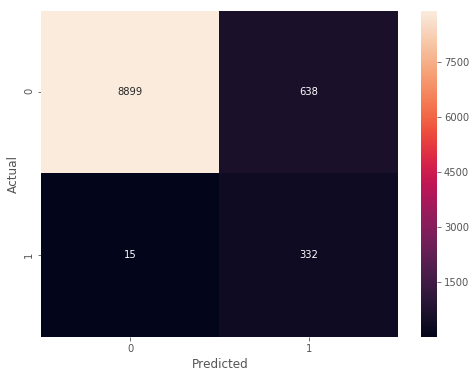

In [59]:
# Logistic regression classifiers 
# matrix to measure classification

from sklearn import metrics
from sklearn.metrics import confusion_matrix

model = LogisticRegression(random_state=0,solver='lbfgs',class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

class_names = df.Lead_Form_submission.unique()
# print classification scores 
print(metrics.classification_report(y_test, y_pred))


# print confusion matric

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

             precision    recall  f1-score   support

          0       1.00      0.95      0.97      9537
          1       0.40      0.90      0.55       347

avg / total       0.98      0.95      0.96      9884



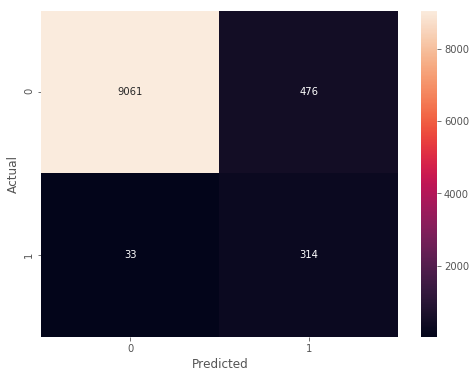

In [60]:
# multinomial classifiers 

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# print classification scores 
print(metrics.classification_report(y_test, y_pred))

# print confusion matric
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

No handles with labels found to put in legend.


             precision    recall  f1-score   support

          0       1.00      0.94      0.97      9537
          1       0.39      0.97      0.56       347

avg / total       0.98      0.95      0.96      9884



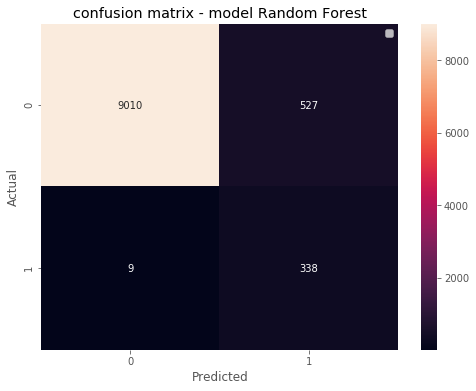

In [61]:
# Random Forest classifiers 

model = RandomForestClassifier(n_estimators=500, max_depth=5,class_weight='balanced',criterion='entropy',random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# print classification scores 
print(metrics.classification_report(y_test, y_pred))

# print confusion matric
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('confusion matrix - model Random Forest')    
plt.legend()
plt.savefig("/Users/akshay/Downloads/ADP_challange/ADP_datascientist_manager/RF_confusion_matrix.png")
plt.show()


             precision    recall  f1-score   support

          0       0.99      0.99      0.99      9537
          1       0.65      0.73      0.69       347

avg / total       0.98      0.98      0.98      9884



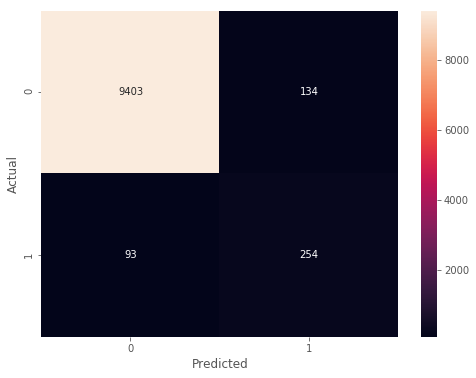

In [62]:
# Gradient boosting classifiers

model=GradientBoostingClassifier(learning_rate=0.05, n_estimators=500, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# print classification scores 
print(metrics.classification_report(y_test, y_pred))

# print confusion matric
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      9537
          1       0.65      0.74      0.70       347

avg / total       0.98      0.98      0.98      9884



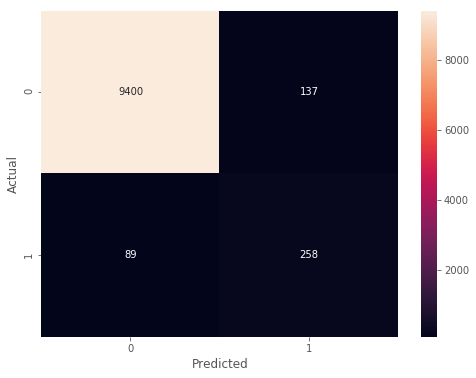

In [63]:
# XGB classifiers 

model=XGBClassifier(learning_rate=0.05, n_estimators=500, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# print classification scores 
print(metrics.classification_report(y_test, y_pred))

# print confusion matric
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()




In [31]:
#comparing all models 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

models = [
    MultinomialNB(),
    LogisticRegression(random_state=0,solver='lbfgs',class_weight='balanced'),
    RandomForestClassifier(n_estimators=500, max_depth=5,class_weight='balanced',criterion='entropy',random_state=0),
    GradientBoostingClassifier(learning_rate=0.05, n_estimators=500, random_state=0),
    XGBClassifier(learning_rate=0.05, n_estimators=500, random_state=0)
]

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, x, y,cv=3, scoring='roc_auc')
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'roc_auc'])
#cv_df

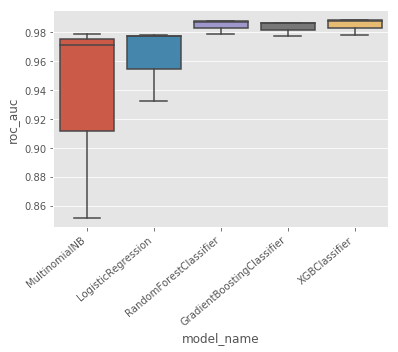

In [70]:
# box plot for ROC-AUC( Area under the ROC curve )
# box plot for model comparisons 
ax=sns.boxplot(x='model_name', y='roc_auc', data=cv_df)
ax.set(xlabel='model_name', ylabel='roc_auc')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.savefig("/Users/akshay/Downloads/ADP_challange/ADP_datascientist_manager/model_comparisions_rocauc.png",bbox_inches="tight")
plt.show()


### ROC for Random Forest model

No skill : ROC AUC=0.500
Random Forest: ROC AUC=0.987


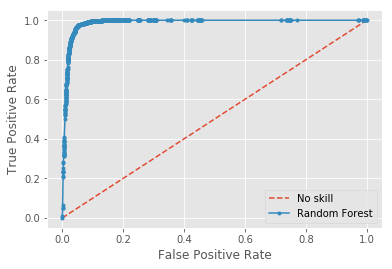

In [37]:
# split into train/test sets
#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]

# fit a model
model = RandomForestClassifier(n_estimators=500, max_depth=5,class_weight='balanced',criterion='entropy',random_state=0)
model.fit(X_train, y_train)

# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No skill : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No skill' )
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig("/Users/akshay/Downloads/ADP_challange/ADP_datascientist_manager/ROC_Random_Forest.png")
plt.show()

### Hyperparameters tuning

In [ ]:
# Perform gridsearch on RandomForest 

param={"n_estimators": np.arange(50,500,200),"max_depth": np.arange(1,50,10)}

rfc = GridSearchCV(RandomForestClassifier(random_state=0,class_weight='balanced',criterion='entropy'),cv=3,param_grid=param)

t0 = time.time()
rfc.fit(X_train, y_train)
rfc = time.time() - t0

model_rfc=rfc.best_estimator_
model_rfc
model_rfc.fit(X_train, y_train)
y_pred = model.predict(X_test)